In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [2]:
data = pd.read_csv('cleveland_short.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.595745,4.581560,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,1.236910,2.248467,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-9.000000,-9.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   fbs       282 non-null    int64  
 6   restecg   282 non-null    int64  
 7   thalach   282 non-null    int64  
 8   exang     282 non-null    int64  
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    int64  
 11  ca        282 non-null    int64  
 12  thal      282 non-null    int64  
 13  num       282 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.0 KB


In [5]:
print("The shape of dataset: ", data.shape)

The shape of dataset:  (282, 14)


In [6]:
print("Displaying NA values in each columns: ")
data.isna().sum(axis=0)

Displaying NA values in each columns: 


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [7]:
print("Displaying NULL values in each columns: ")
data.isnull().sum()

Displaying NULL values in each columns: 


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [8]:
data = data.dropna()

data.shape

(282, 14)

In [9]:
data = data.sample(frac=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
22,58,1,2,120,284,0,2,160,0,1.8,2,0,3,1
196,69,1,1,160,234,1,2,131,0,0.1,2,1,3,0
201,64,0,4,180,325,0,0,154,1,0.0,1,0,3,0
163,58,0,4,100,248,0,2,122,0,1.0,2,0,3,0
122,51,1,3,100,222,0,0,143,1,1.2,2,0,3,0


In [10]:
X_df = data.copy()
Y_df = X_df.pop('num')

print('X Values')
display(X_df)
print('Y Values')
display(Y_df)

print('Shape of X:', X_df.shape)
print('Shape of Y:', Y_df.shape)

X Values


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
22,58,1,2,120,284,0,2,160,0,1.8,2,0,3
196,69,1,1,160,234,1,2,131,0,0.1,2,1,3
201,64,0,4,180,325,0,0,154,1,0.0,1,0,3
163,58,0,4,100,248,0,2,122,0,1.0,2,0,3
122,51,1,3,100,222,0,0,143,1,1.2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
112,52,1,1,118,186,0,2,190,0,0.0,2,0,6
19,49,1,2,130,266,0,0,171,0,0.6,1,0,3
15,57,1,3,150,168,0,0,174,0,1.6,1,0,3


Y Values


22     1
196    0
201    0
163    0
122    0
      ..
4      0
112    0
19     0
15     0
69     1
Name: num, Length: 282, dtype: int64

Shape of X: (282, 13)
Shape of Y: (282,)


In [11]:
Y_labels = pd.get_dummies(Y_df, prefix='Label')

print('All Labels:')
display(Y_labels)

All Labels:


,Label_0,Label_1,Label_2,Label_3,Label_4
22,0,1,0,0,0
196,1,0,0,0,0
201,1,0,0,0,0
163,1,0,0,0,0
122,1,0,0,0,0
...,...,...,...,...,...
4,1,0,0,0,0
112,1,0,0,0,0
19,1,0,0,0,0
15,1,0,0,0,0


In [12]:
X_stats = X_df.describe()
X_stats = X_stats.transpose()
display(X_stats)

,count,mean,std,min,25%,50%,75%,max
age,282.0,54.411348,9.053083,29.0,48.00,55.0,61.00,77.0
sex,282.0,0.677305,0.468338,0.0,0.00,1.0,1.00,1.0
cp,282.0,3.163121,0.955405,1.0,3.00,3.0,4.00,4.0
trestbps,282.0,131.563830,17.757496,94.0,120.00,130.0,140.00,200.0
chol,282.0,249.092199,51.217546,126.0,213.00,244.0,277.00,564.0
fbs,282.0,0.148936,0.356658,0.0,0.00,0.0,0.00,1.0
restecg,282.0,1.014184,0.998118,0.0,0.00,2.0,2.00,2.0
thalach,282.0,149.765957,22.923869,71.0,133.25,153.5,165.75,202.0
exang,282.0,0.326241,0.469670,0.0,0.00,0.0,1.00,1.0
oldpeak,282.0,1.026950,1.138825,0.0,0.00,0.8,1.60,6.2


In [13]:
# Normalisation Steps

X_norm = (X_df - X_stats['mean'])/X_stats['std']

X_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
22,0.396401,0.689021,-1.217411,-0.651208,0.681559,-0.417588,0.987674,0.446436,-0.694617,0.678813,0.680488,-0.481639,-0.703395
196,1.611457,0.689021,-2.264087,1.601362,-0.294669,2.386215,0.987674,-0.818621,-0.694617,-0.813953,0.680488,0.326827,-0.703395
201,1.059159,-1.446187,0.875942,2.727646,1.482066,-0.417588,-1.016097,0.184700,1.434536,-0.901763,-0.959662,-0.481639,-0.703395
163,0.396401,-1.446187,0.875942,-1.777493,-0.021325,-0.417588,0.987674,-1.211225,-0.694617,-0.023665,0.680488,-0.481639,-0.703395
122,-0.376816,0.689021,-0.170734,-1.777493,-0.528963,-0.417588,-1.016097,-0.295149,1.434536,0.151955,0.680488,-0.481639,-0.703395
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,-1.481412,-1.446187,-1.217411,-0.088066,-0.880405,-0.417588,0.987674,0.969908,-0.694617,0.327574,-0.959662,-0.481639,-0.703395
112,-0.266357,0.689021,-2.264087,-0.763837,-1.231847,-0.417588,0.987674,1.755116,-0.694617,-0.901763,0.680488,-0.481639,0.630848
19,-0.597735,0.689021,-1.217411,-0.088066,0.330117,-0.417588,-1.016097,0.926285,-0.694617,-0.374904,-0.959662,-0.481639,-0.703395
15,0.285942,0.689021,-0.170734,1.038219,-1.583289,-0.417588,-1.016097,1.057153,-0.694617,0.503194,-0.959662,-0.481639,-0.703395


In [14]:
x_train, x_test_valid, y_train, y_test_valid = train_test_split(X_norm, Y_labels, test_size=0.2)

print("Size of x_train: ", x_train.shape)
print("Size of y_train: ", y_train.shape)
print("Size of x_test_valid: ", x_test_valid.shape)
print("Size of y_test_valid: ", y_test_valid.shape)

print("X Train Data")
display(x_train.head())
print("Y Train Data")
display(y_train.head())
print("X Test Validation Data")
display(x_test_valid.head())
print("Y Test Validation Data")
display(y_test_valid.head())

Size of x_train:  (225, 13)
Size of y_train:  (225, 5)
Size of x_test_valid:  (57, 13)
Size of y_test_valid:  (57, 5)
X Train Data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,1.169618,0.689021,-2.264087,0.362448,0.642510,2.386215,0.987674,1.057153,-0.694617,0.327574,0.680488,0.326827,-0.703395
190,-0.487276,0.689021,-0.170734,-0.144380,-1.036602,-0.417588,-1.016097,0.577304,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395
116,0.396401,0.689021,-0.170734,0.475077,-0.743733,2.386215,0.987674,0.664549,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395
57,-1.481412,0.689021,0.875942,-1.214351,-1.505191,-0.417588,0.987674,0.359191,-0.694617,-0.901763,-0.959662,-0.481639,1.075595
258,1.721917,0.689021,-1.217411,1.376105,-0.079898,-0.417588,0.987674,-0.295149,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395


Y Train Data


,Label_0,Label_1,Label_2,Label_3,Label_4
124,0,1,0,0,0
190,1,0,0,0,0
116,1,0,0,0,0
57,0,1,0,0,0
258,1,0,0,0,0


X Test Validation Data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
278,0.285942,0.689021,-1.217411,1.263476,-0.333718,-0.417588,0.987674,0.620927,-0.694617,-0.901763,-0.959662,0.326827,-0.703395
185,0.948699,-1.446187,-1.217411,0.475077,-1.056126,-0.417588,-1.016097,1.275267,-0.694617,-0.901763,-0.959662,1.135293,-0.703395
163,0.396401,-1.446187,0.875942,-1.777493,-0.021325,-0.417588,0.987674,-1.211225,-0.694617,-0.023665,0.680488,-0.481639,-0.703395
259,0.285942,0.689021,-1.217411,-0.425951,0.232495,-0.417588,-1.016097,-0.382394,-0.694617,-0.638334,-0.959662,-0.481639,1.075595
67,-0.045437,0.689021,-0.170734,1.038219,-0.333718,-0.417588,0.987674,0.664549,-0.694617,0.503194,-0.959662,-0.481639,1.075595


Y Test Validation Data


,Label_0,Label_1,Label_2,Label_3,Label_4
278,0,1,0,0,0
185,1,0,0,0,0
163,1,0,0,0,0
259,0,1,0,0,0
67,1,0,0,0,0


In [15]:
x_test, x_valid, y_test, y_valid = train_test_split(x_test_valid, y_test_valid, test_size=0.5)

print("Size of x_test: ", x_test.shape)
print("Size of y_test: ", y_test.shape)
print("Size of x_valid: ", x_valid.shape)
print("Size of y_valid: ", y_valid.shape)

print("X Test Data")
display(x_test.head())
print("Y Test Data")
display(y_test.head())
print("X Validation Data")
display(x_valid.head())
print("Y Validation Data")
display(y_valid.head())

Size of x_test:  (28, 13)
Size of y_test:  (28, 5)
Size of x_valid:  (29, 13)
Size of y_valid:  (29, 5)
X Test Data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
60,-0.376816,-1.446187,0.875942,-0.088066,1.091575,-0.417588,-1.016097,-0.338772,1.434536,0.151955,0.680488,-0.481639,1.075595
239,-1.370953,0.689021,-1.217411,-0.651208,0.896330,-0.417588,-1.016097,0.533681,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395
84,-0.266357,0.689021,-1.217411,-0.651208,1.482066,-0.417588,-1.016097,0.969908,-0.694617,-0.726143,-0.959662,-0.481639,-0.703395
2,1.390538,0.689021,0.875942,-0.651208,-0.392291,-0.417588,0.987674,-0.905866,1.434536,1.381292,0.680488,1.135293,1.075595
249,0.838240,0.689021,-1.217411,-0.200694,-0.802307,2.386215,0.987674,-0.426017,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395


Y Test Data


,Label_0,Label_1,Label_2,Label_3,Label_4
60,0,0,1,0,0
239,1,0,0,0,0
84,1,0,0,0,0
2,0,1,0,0,0
249,1,0,0,0,0


X Validation Data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
71,1.390538,0.689021,0.875942,-0.369637,0.095823,2.386215,-1.016097,0.577304,-0.694617,-0.726143,0.680488,1.135293,1.075595
111,0.175482,0.689021,0.875942,-0.369637,-0.001800,2.386215,0.987674,-0.251526,1.434536,0.151955,0.680488,0.326827,-0.703395
216,-0.929114,-1.446187,-1.217411,-1.495922,-0.880405,-0.417588,-1.016097,0.969908,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395
94,0.948699,-1.446187,-0.170734,0.193505,0.056774,-0.417588,0.987674,0.969908,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395
210,-1.923251,-1.446187,-0.170734,-0.651208,-0.665635,-0.417588,-1.016097,0.882663,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395


Y Validation Data


,Label_0,Label_1,Label_2,Label_3,Label_4
71,0,0,0,1,0
111,0,1,0,0,0
216,1,0,0,0,0
94,1,0,0,0,0
210,1,0,0,0,0


## Training Our Models

In [16]:
def build_base_model():
    model = Sequential()
    
    model.add(Dense(7, kernel_initializer = 'uniform', activation = 'relu', input_shape = (x_train.shape[1], )))
    model.add(Dense(7, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(5, kernel_initializer = 'uniform', activation='softmax'))
    
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

EPOCHS = 1000
batch_size = 10

base_model = build_base_model()
print('Base Model Summary:')
base_model.summary()


with tf.device('/CPU:0'):
    history = base_model.fit(
        x_train, 
        y_train,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=False,
        steps_per_epoch = int(x_train.shape[0] / batch_size) ,
        validation_data = (x_valid, y_valid),   
    )



Base Model Summary:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 98        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 40        
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
22/22 [==============================] - 1s 19ms/step - loss: 1.6015 - accuracy: 0.5500 - val_loss: 1.5912 - val_accuracy: 0.5862
Epoch 2/1000
22/22 [==============================] - 0s 4ms/step - loss: 1.5808 - accuracy: 0.5581 - val_loss: 1.5625 - val_accuracy: 0.5862
Epoch 3/1000
22/22 [==============================] - 0s 4ms/step - loss: 1.5441 - 

22/22 [==============================] - 0s 3ms/step - loss: 0.8537 - accuracy: 0.6512 - val_loss: 0.6907 - val_accuracy: 0.7586
Epoch 54/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8470 - accuracy: 0.6512 - val_loss: 0.6901 - val_accuracy: 0.7586
Epoch 55/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8590 - accuracy: 0.6372 - val_loss: 0.6902 - val_accuracy: 0.7586
Epoch 56/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8837 - accuracy: 0.6279 - val_loss: 0.6894 - val_accuracy: 0.7586
Epoch 57/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8524 - accuracy: 0.6372 - val_loss: 0.6894 - val_accuracy: 0.7241
Epoch 58/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8483 - accuracy: 0.6512 - val_loss: 0.6891 - val_accuracy: 0.7241
Epoch 59/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8410 - accuracy: 0.6558 - val_loss: 0.6889 - val_accuracy: 0.7241
Epoch 60/1000

22/22 [==============================] - 0s 3ms/step - loss: 0.7957 - accuracy: 0.6744 - val_loss: 0.6925 - val_accuracy: 0.7241
Epoch 111/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8158 - accuracy: 0.6698 - val_loss: 0.6929 - val_accuracy: 0.7241
Epoch 112/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8026 - accuracy: 0.6651 - val_loss: 0.6931 - val_accuracy: 0.7241
Epoch 113/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8093 - accuracy: 0.6698 - val_loss: 0.6931 - val_accuracy: 0.7241
Epoch 114/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8278 - accuracy: 0.6512 - val_loss: 0.6934 - val_accuracy: 0.7241
Epoch 115/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8095 - accuracy: 0.6698 - val_loss: 0.6930 - val_accuracy: 0.7241
Epoch 116/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8048 - accuracy: 0.6727 - val_loss: 0.6926 - val_accuracy: 0.7241
Epoch 1

Epoch 167/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.7658 - accuracy: 0.6698 - val_loss: 0.7209 - val_accuracy: 0.6897
Epoch 168/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.7407 - accuracy: 0.6977 - val_loss: 0.7218 - val_accuracy: 0.6897
Epoch 169/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.7338 - accuracy: 0.6977 - val_loss: 0.7233 - val_accuracy: 0.6897
Epoch 170/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.7458 - accuracy: 0.6930 - val_loss: 0.7248 - val_accuracy: 0.6897
Epoch 171/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.7707 - accuracy: 0.6744 - val_loss: 0.7270 - val_accuracy: 0.6897
Epoch 172/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7415 - accuracy: 0.6884 - val_loss: 0.7274 - val_accuracy: 0.6897
Epoch 173/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.7451 - accuracy: 0.6884 - val_loss: 0.7288 - val_accuracy:

Epoch 224/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.7209 - val_loss: 0.7919 - val_accuracy: 0.6897
Epoch 225/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.7302 - val_loss: 0.7926 - val_accuracy: 0.6897
Epoch 226/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7039 - accuracy: 0.7256 - val_loss: 0.7906 - val_accuracy: 0.6897
Epoch 227/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.7442 - val_loss: 0.7937 - val_accuracy: 0.6897
Epoch 228/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.7302 - val_loss: 0.7980 - val_accuracy: 0.6897
Epoch 229/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7114 - accuracy: 0.7256 - val_loss: 0.7956 - val_accuracy: 0.6897
Epoch 230/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6986 - accuracy: 0.7256 - val_loss: 0.7882 - val_accuracy:

Epoch 281/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.7256 - val_loss: 0.8409 - val_accuracy: 0.6552
Epoch 282/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.7163 - val_loss: 0.8405 - val_accuracy: 0.6552
Epoch 283/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.7302 - val_loss: 0.8368 - val_accuracy: 0.6552
Epoch 284/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6188 - accuracy: 0.7349 - val_loss: 0.8416 - val_accuracy: 0.6552
Epoch 285/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6315 - accuracy: 0.7395 - val_loss: 0.8445 - val_accuracy: 0.6552
Epoch 286/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6597 - accuracy: 0.7163 - val_loss: 0.8455 - val_accuracy: 0.6552
Epoch 287/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6417 - accuracy: 0.7302 - val_loss: 0.8399 - val_accuracy:

Epoch 338/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5801 - accuracy: 0.7721 - val_loss: 0.9168 - val_accuracy: 0.6552
Epoch 339/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.7442 - val_loss: 0.9209 - val_accuracy: 0.6552
Epoch 340/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5917 - accuracy: 0.7581 - val_loss: 0.9162 - val_accuracy: 0.6552
Epoch 341/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6048 - accuracy: 0.7535 - val_loss: 0.9185 - val_accuracy: 0.6552
Epoch 342/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5824 - accuracy: 0.7674 - val_loss: 0.9239 - val_accuracy: 0.6552
Epoch 343/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6030 - accuracy: 0.7535 - val_loss: 0.9305 - val_accuracy: 0.6552
Epoch 344/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6103 - accuracy: 0.7442 - val_loss: 0.9242 - val_accuracy:

Epoch 395/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5757 - accuracy: 0.7581 - val_loss: 1.0613 - val_accuracy: 0.6552
Epoch 396/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5768 - accuracy: 0.7581 - val_loss: 1.0643 - val_accuracy: 0.6552
Epoch 397/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5740 - accuracy: 0.7581 - val_loss: 1.0723 - val_accuracy: 0.6552
Epoch 398/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5496 - accuracy: 0.7628 - val_loss: 1.0607 - val_accuracy: 0.6552
Epoch 399/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.7721 - val_loss: 1.0709 - val_accuracy: 0.6552
Epoch 400/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5546 - accuracy: 0.7721 - val_loss: 1.0626 - val_accuracy: 0.6552
Epoch 401/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5851 - accuracy: 0.7535 - val_loss: 1.0705 - val_accuracy:

Epoch 452/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5204 - accuracy: 0.7907 - val_loss: 1.1603 - val_accuracy: 0.6207
Epoch 453/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5115 - accuracy: 0.8000 - val_loss: 1.1514 - val_accuracy: 0.6207
Epoch 454/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5423 - accuracy: 0.7674 - val_loss: 1.1598 - val_accuracy: 0.6207
Epoch 455/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5283 - accuracy: 0.7907 - val_loss: 1.1594 - val_accuracy: 0.6207
Epoch 456/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5395 - accuracy: 0.7767 - val_loss: 1.1695 - val_accuracy: 0.6207
Epoch 457/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.7953 - val_loss: 1.1576 - val_accuracy: 0.6207
Epoch 458/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5393 - accuracy: 0.7814 - val_loss: 1.1743 - val_accuracy:

Epoch 509/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.7860 - val_loss: 1.2634 - val_accuracy: 0.5862
Epoch 510/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5153 - accuracy: 0.7814 - val_loss: 1.2729 - val_accuracy: 0.5862
Epoch 511/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5192 - accuracy: 0.7767 - val_loss: 1.2738 - val_accuracy: 0.5862
Epoch 512/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5125 - accuracy: 0.7814 - val_loss: 1.2678 - val_accuracy: 0.5862
Epoch 513/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4896 - accuracy: 0.7860 - val_loss: 1.2769 - val_accuracy: 0.5862
Epoch 514/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4882 - accuracy: 0.8000 - val_loss: 1.2718 - val_accuracy: 0.5862
Epoch 515/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4908 - accuracy: 0.7953 - val_loss: 1.2769 - val_accuracy:

Epoch 566/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.7953 - val_loss: 1.3642 - val_accuracy: 0.5862
Epoch 567/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4689 - accuracy: 0.8047 - val_loss: 1.3686 - val_accuracy: 0.5862
Epoch 568/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4612 - accuracy: 0.8140 - val_loss: 1.3720 - val_accuracy: 0.5862
Epoch 569/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4918 - accuracy: 0.7860 - val_loss: 1.3534 - val_accuracy: 0.5862
Epoch 570/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4801 - accuracy: 0.7860 - val_loss: 1.3543 - val_accuracy: 0.5862
Epoch 571/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7907 - val_loss: 1.3614 - val_accuracy: 0.5862
Epoch 572/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.8093 - val_loss: 1.3668 - val_accuracy:

Epoch 623/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4431 - accuracy: 0.8140 - val_loss: 1.4362 - val_accuracy: 0.5862
Epoch 624/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4536 - accuracy: 0.7907 - val_loss: 1.4394 - val_accuracy: 0.5862
Epoch 625/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4635 - accuracy: 0.7953 - val_loss: 1.4325 - val_accuracy: 0.6207
Epoch 626/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4673 - accuracy: 0.7907 - val_loss: 1.4441 - val_accuracy: 0.5862
Epoch 627/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4577 - accuracy: 0.7953 - val_loss: 1.4437 - val_accuracy: 0.5862
Epoch 628/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8000 - val_loss: 1.4467 - val_accuracy: 0.5862
Epoch 629/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8047 - val_loss: 1.4438 - val_accuracy:

Epoch 680/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4354 - accuracy: 0.8140 - val_loss: 1.5489 - val_accuracy: 0.5862
Epoch 681/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4305 - accuracy: 0.8093 - val_loss: 1.5308 - val_accuracy: 0.5862
Epoch 682/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4075 - accuracy: 0.8233 - val_loss: 1.5279 - val_accuracy: 0.5862
Epoch 683/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4059 - accuracy: 0.8372 - val_loss: 1.5399 - val_accuracy: 0.5517
Epoch 684/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4338 - accuracy: 0.8047 - val_loss: 1.5257 - val_accuracy: 0.5862
Epoch 685/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4261 - accuracy: 0.8093 - val_loss: 1.5500 - val_accuracy: 0.5517
Epoch 686/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4288 - accuracy: 0.8093 - val_loss: 1.5368 - val_accuracy:

Epoch 737/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4013 - accuracy: 0.8227 - val_loss: 1.6647 - val_accuracy: 0.5517
Epoch 738/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3889 - accuracy: 0.8372 - val_loss: 1.6744 - val_accuracy: 0.5517
Epoch 739/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3947 - accuracy: 0.8233 - val_loss: 1.6911 - val_accuracy: 0.5517
Epoch 740/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4055 - accuracy: 0.8233 - val_loss: 1.7004 - val_accuracy: 0.5517
Epoch 741/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4107 - accuracy: 0.8093 - val_loss: 1.6865 - val_accuracy: 0.5517
Epoch 742/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4034 - accuracy: 0.8140 - val_loss: 1.7162 - val_accuracy: 0.5517
Epoch 743/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3835 - accuracy: 0.8279 - val_loss: 1.7031 - val_accuracy:

Epoch 794/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3647 - accuracy: 0.8419 - val_loss: 1.8840 - val_accuracy: 0.5517
Epoch 795/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3721 - accuracy: 0.8419 - val_loss: 1.8905 - val_accuracy: 0.5517
Epoch 796/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3655 - accuracy: 0.8372 - val_loss: 1.8953 - val_accuracy: 0.5517
Epoch 797/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3495 - accuracy: 0.8465 - val_loss: 1.8993 - val_accuracy: 0.5517
Epoch 798/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3446 - accuracy: 0.8605 - val_loss: 1.8997 - val_accuracy: 0.5517
Epoch 799/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3702 - accuracy: 0.8326 - val_loss: 1.9103 - val_accuracy: 0.5517
Epoch 800/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3645 - accuracy: 0.8372 - val_loss: 1.9231 - val_accuracy:

22/22 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8372 - val_loss: 2.1217 - val_accuracy: 0.5517
Epoch 851/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8372 - val_loss: 2.0742 - val_accuracy: 0.5517
Epoch 852/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8409 - val_loss: 2.1215 - val_accuracy: 0.5517
Epoch 853/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8512 - val_loss: 2.1077 - val_accuracy: 0.5517
Epoch 854/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3344 - accuracy: 0.8465 - val_loss: 2.1330 - val_accuracy: 0.5517
Epoch 855/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3469 - accuracy: 0.8419 - val_loss: 2.1382 - val_accuracy: 0.5517
Epoch 856/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3520 - accuracy: 0.8372 - val_loss: 2.1122 - val_accuracy: 0.5517
Epoch 8

Epoch 907/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3333 - accuracy: 0.8465 - val_loss: 2.3567 - val_accuracy: 0.5517
Epoch 908/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3279 - accuracy: 0.8465 - val_loss: 2.3669 - val_accuracy: 0.5517
Epoch 909/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3191 - accuracy: 0.8558 - val_loss: 2.3836 - val_accuracy: 0.5517
Epoch 910/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3268 - accuracy: 0.8512 - val_loss: 2.3781 - val_accuracy: 0.5517
Epoch 911/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3199 - accuracy: 0.8558 - val_loss: 2.3791 - val_accuracy: 0.5517
Epoch 912/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3077 - accuracy: 0.8605 - val_loss: 2.3709 - val_accuracy: 0.5517
Epoch 913/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3019 - accuracy: 0.8698 - val_loss: 2.3960 - val_accuracy:

Epoch 964/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3098 - accuracy: 0.8651 - val_loss: 2.6960 - val_accuracy: 0.5517
Epoch 965/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3117 - accuracy: 0.8698 - val_loss: 2.7001 - val_accuracy: 0.5517
Epoch 966/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3094 - accuracy: 0.8698 - val_loss: 2.7102 - val_accuracy: 0.5517
Epoch 967/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3042 - accuracy: 0.8682 - val_loss: 2.7060 - val_accuracy: 0.5517
Epoch 968/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2931 - accuracy: 0.8744 - val_loss: 2.7471 - val_accuracy: 0.5517
Epoch 969/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2947 - accuracy: 0.8791 - val_loss: 2.7135 - val_accuracy: 0.5517
Epoch 970/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3072 - accuracy: 0.8744 - val_loss: 2.7462 - val_accuracy:

In [17]:
print('Summary of the base model results after each epoch: ')
base_hist = pd.DataFrame(history.history)
base_hist['epoch'] = history.epoch
base_hist.tail()

Summary of the base model results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
995,0.292469,0.883721,2.891370,0.551724,995
996,0.288857,0.883721,2.919742,0.551724,996
997,0.281377,0.893023,2.885673,0.551724,997
998,0.305769,0.874419,2.911150,0.551724,998
999,0.301513,0.874419,2.888608,0.551724,999


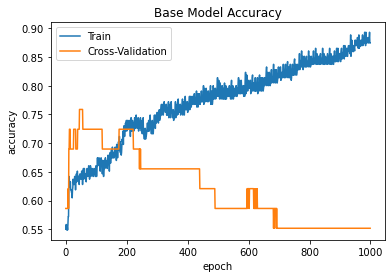

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Base Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

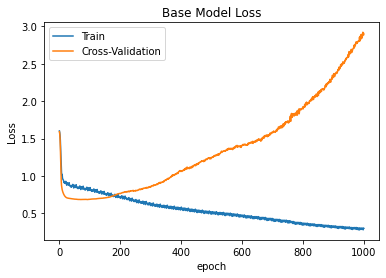

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Base Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [20]:
print('Train Split: ')
loss, accuracy = base_model.evaluate(x_train, y_train, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
8/8 [==============================] - 0s 3ms/step - loss: 0.2914 - accuracy: 0.8800
Accuracy   :  0.88 


In [21]:
print('Evaluation Split: ')
loss, accuracy =  base_model.evaluate(x_valid, y_valid, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
1/1 - 0s - loss: 2.8886 - accuracy: 0.5517
Accuracy   :  0.55 


In [22]:
print('Test Split: ')
loss, accuracy =  base_model.evaluate(x_test, y_test, verbose=2)

print("Accuracy   : {:5.2f}".format(accuracy))

Test Split: 
1/1 - 0s - loss: 5.9468 - accuracy: 0.4643
Accuracy   :  0.46


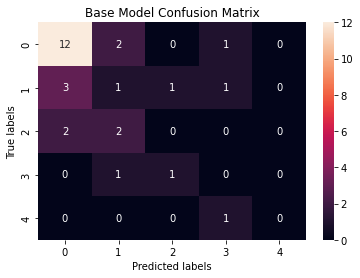

In [23]:
from sklearn.metrics import confusion_matrix

base_cm_ax = plt.subplot()
base_model_predict_results = base_model.predict(x_test)

base_model_predict_results = base_model_predict_results.argmax(axis = 1)

test_labels = y_test.to_numpy().argmax(axis = 1)

base_cm = confusion_matrix(test_labels, base_model_predict_results)

sns.heatmap(base_cm, annot=True, ax = base_cm_ax);

base_cm_ax.set_xlabel('Predicted labels');base_cm_ax.set_ylabel('True labels'); 
base_cm_ax.set_title('Base Model Confusion Matrix'); 

## Training Model with Gaussian Noise Layer

In [24]:
from tensorflow.keras.layers import GaussianNoise

def build_gaussian_model():
    model = Sequential()
    
    model.add(Dense(7, kernel_initializer = 'uniform', activation = 'sigmoid', input_shape = (x_train.shape[1], )))
    model.add(GaussianNoise(0.1, input_shape = (x_train.shape[1], )))
    model.add(Dense(7, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(5, kernel_initializer = 'uniform', activation='softmax'))
    
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

EPOCHS = 1000
batch_size = 10

gaussian_model = build_gaussian_model()
print('Gaussian Model Summary:')
gaussian_model.summary()


with tf.device('/CPU:0'):
    history = gaussian_model.fit(
        x_train, 
        y_train,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=False,
        steps_per_epoch = int(x_train.shape[0] / batch_size) ,
        validation_data = (x_valid, y_valid),   
    )

Gaussian Model Summary:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 7)                 98        
_________________________________________________________________
gaussian_noise (GaussianNois (None, 7)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 40        
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
22/22 [==============================] - 0s 8ms/step - loss: 1.6005 - accuracy: 0.5364 - val_loss: 1.5891 - val_accuracy: 0.5862
Epoch 2/1000
22/22 [==============================] - 0s 3ms/step - loss: 1.5767 - accur

Epoch 52/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.9332 - accuracy: 0.6140 - val_loss: 0.7420 - val_accuracy: 0.7241
Epoch 53/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.9114 - accuracy: 0.6279 - val_loss: 0.7409 - val_accuracy: 0.7241
Epoch 54/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.9066 - accuracy: 0.6140 - val_loss: 0.7392 - val_accuracy: 0.7241
Epoch 55/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.9113 - accuracy: 0.6140 - val_loss: 0.7380 - val_accuracy: 0.7241
Epoch 56/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.9391 - accuracy: 0.6093 - val_loss: 0.7378 - val_accuracy: 0.7241
Epoch 57/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.9115 - accuracy: 0.6140 - val_loss: 0.7370 - val_accuracy: 0.7241
Epoch 58/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.9032 - accuracy: 0.6372 - val_loss: 0.7356 - val_accuracy: 0.7241

22/22 [==============================] - 0s 3ms/step - loss: 0.8929 - accuracy: 0.6279 - val_loss: 0.7120 - val_accuracy: 0.7241
Epoch 110/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8869 - accuracy: 0.6372 - val_loss: 0.7115 - val_accuracy: 0.7241
Epoch 111/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.9045 - accuracy: 0.6233 - val_loss: 0.7110 - val_accuracy: 0.7241
Epoch 112/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8947 - accuracy: 0.6465 - val_loss: 0.7113 - val_accuracy: 0.7241
Epoch 113/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8737 - accuracy: 0.6326 - val_loss: 0.7110 - val_accuracy: 0.7241
Epoch 114/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.9298 - accuracy: 0.6140 - val_loss: 0.7108 - val_accuracy: 0.7241
Epoch 115/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8948 - accuracy: 0.6372 - val_loss: 0.7100 - val_accuracy: 0.7241
Epoch 1

Epoch 166/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8844 - accuracy: 0.6326 - val_loss: 0.7051 - val_accuracy: 0.7241
Epoch 167/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.9093 - accuracy: 0.6140 - val_loss: 0.7057 - val_accuracy: 0.7241
Epoch 168/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8813 - accuracy: 0.6465 - val_loss: 0.7059 - val_accuracy: 0.7241
Epoch 169/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8790 - accuracy: 0.6372 - val_loss: 0.7062 - val_accuracy: 0.7241
Epoch 170/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8881 - accuracy: 0.6465 - val_loss: 0.7065 - val_accuracy: 0.7241
Epoch 171/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.9168 - accuracy: 0.6000 - val_loss: 0.7064 - val_accuracy: 0.7241
Epoch 172/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8802 - accuracy: 0.6186 - val_loss: 0.7061 - val_accuracy:

Epoch 223/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.8467 - accuracy: 0.6605 - val_loss: 0.7056 - val_accuracy: 0.7241
Epoch 224/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.8688 - accuracy: 0.6651 - val_loss: 0.7051 - val_accuracy: 0.7241
Epoch 225/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.8680 - accuracy: 0.6372 - val_loss: 0.7044 - val_accuracy: 0.7241
Epoch 226/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.8695 - accuracy: 0.6651 - val_loss: 0.7036 - val_accuracy: 0.7241
Epoch 227/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.8629 - accuracy: 0.6465 - val_loss: 0.7035 - val_accuracy: 0.7241
Epoch 228/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.8528 - accuracy: 0.6558 - val_loss: 0.7035 - val_accuracy: 0.7241
Epoch 229/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.8920 - accuracy: 0.6186 - val_loss: 0.7037 - val_accuracy:

Epoch 280/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8844 - accuracy: 0.6605 - val_loss: 0.7059 - val_accuracy: 0.7241
Epoch 281/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8728 - accuracy: 0.6419 - val_loss: 0.7060 - val_accuracy: 0.7241
Epoch 282/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8769 - accuracy: 0.6372 - val_loss: 0.7057 - val_accuracy: 0.7241
Epoch 283/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8488 - accuracy: 0.6558 - val_loss: 0.7058 - val_accuracy: 0.7241
Epoch 284/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8413 - accuracy: 0.6605 - val_loss: 0.7065 - val_accuracy: 0.7241
Epoch 285/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8608 - accuracy: 0.6558 - val_loss: 0.7069 - val_accuracy: 0.7241
Epoch 286/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8913 - accuracy: 0.6186 - val_loss: 0.7071 - val_accuracy:

Epoch 337/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8311 - accuracy: 0.6326 - val_loss: 0.7097 - val_accuracy: 0.7241
Epoch 338/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8227 - accuracy: 0.6651 - val_loss: 0.7096 - val_accuracy: 0.7241
Epoch 339/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8512 - accuracy: 0.6512 - val_loss: 0.7090 - val_accuracy: 0.7241
Epoch 340/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8347 - accuracy: 0.6558 - val_loss: 0.7093 - val_accuracy: 0.7241
Epoch 341/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8457 - accuracy: 0.6419 - val_loss: 0.7093 - val_accuracy: 0.7241
Epoch 342/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8459 - accuracy: 0.6512 - val_loss: 0.7091 - val_accuracy: 0.7241
Epoch 343/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8327 - accuracy: 0.6326 - val_loss: 0.7091 - val_accuracy:

Epoch 394/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8238 - accuracy: 0.6791 - val_loss: 0.7097 - val_accuracy: 0.7241
Epoch 395/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8436 - accuracy: 0.6605 - val_loss: 0.7081 - val_accuracy: 0.7241
Epoch 396/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8206 - accuracy: 0.6651 - val_loss: 0.7074 - val_accuracy: 0.7241
Epoch 397/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8418 - accuracy: 0.6605 - val_loss: 0.7090 - val_accuracy: 0.7241
Epoch 398/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8179 - accuracy: 0.6698 - val_loss: 0.7101 - val_accuracy: 0.7241
Epoch 399/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8118 - accuracy: 0.6791 - val_loss: 0.7103 - val_accuracy: 0.7241
Epoch 400/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8284 - accuracy: 0.6744 - val_loss: 0.7101 - val_accuracy:

Epoch 451/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.8239 - accuracy: 0.6698 - val_loss: 0.7180 - val_accuracy: 0.7241
Epoch 452/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.7939 - accuracy: 0.6744 - val_loss: 0.7185 - val_accuracy: 0.7241
Epoch 453/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.8006 - accuracy: 0.6791 - val_loss: 0.7191 - val_accuracy: 0.7241
Epoch 454/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.8276 - accuracy: 0.6651 - val_loss: 0.7180 - val_accuracy: 0.7241
Epoch 455/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.7936 - accuracy: 0.6884 - val_loss: 0.7170 - val_accuracy: 0.7241
Epoch 456/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8203 - accuracy: 0.6698 - val_loss: 0.7169 - val_accuracy: 0.7241
Epoch 457/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.7978 - accuracy: 0.6884 - val_loss: 0.7186 - val_accuracy:

Epoch 508/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7678 - accuracy: 0.6791 - val_loss: 0.7217 - val_accuracy: 0.6897
Epoch 509/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7904 - accuracy: 0.6605 - val_loss: 0.7222 - val_accuracy: 0.6897
Epoch 510/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8047 - accuracy: 0.6744 - val_loss: 0.7224 - val_accuracy: 0.6897
Epoch 511/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8058 - accuracy: 0.6698 - val_loss: 0.7219 - val_accuracy: 0.6897
Epoch 512/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8117 - accuracy: 0.6837 - val_loss: 0.7225 - val_accuracy: 0.6897
Epoch 513/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7907 - accuracy: 0.6884 - val_loss: 0.7231 - val_accuracy: 0.6897
Epoch 514/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7958 - accuracy: 0.6744 - val_loss: 0.7222 - val_accuracy:

Epoch 565/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7859 - accuracy: 0.6837 - val_loss: 0.7297 - val_accuracy: 0.6897
Epoch 566/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7729 - accuracy: 0.6791 - val_loss: 0.7318 - val_accuracy: 0.6897
Epoch 567/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7684 - accuracy: 0.6930 - val_loss: 0.7322 - val_accuracy: 0.6897
Epoch 568/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7438 - accuracy: 0.6791 - val_loss: 0.7330 - val_accuracy: 0.6897
Epoch 569/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7762 - accuracy: 0.6651 - val_loss: 0.7328 - val_accuracy: 0.6897
Epoch 570/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7710 - accuracy: 0.6698 - val_loss: 0.7318 - val_accuracy: 0.6897
Epoch 571/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7630 - accuracy: 0.6791 - val_loss: 0.7319 - val_accuracy:

Epoch 622/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7585 - accuracy: 0.6500 - val_loss: 0.7332 - val_accuracy: 0.6897
Epoch 623/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7422 - accuracy: 0.6930 - val_loss: 0.7334 - val_accuracy: 0.6897
Epoch 624/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7643 - accuracy: 0.6698 - val_loss: 0.7335 - val_accuracy: 0.6897
Epoch 625/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.7797 - accuracy: 0.6837 - val_loss: 0.7339 - val_accuracy: 0.6897
Epoch 626/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.7862 - accuracy: 0.6744 - val_loss: 0.7322 - val_accuracy: 0.6897
Epoch 627/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.7891 - accuracy: 0.6698 - val_loss: 0.7315 - val_accuracy: 0.6897
Epoch 628/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.7419 - accuracy: 0.6837 - val_loss: 0.7318 - val_accuracy:

Epoch 679/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7497 - accuracy: 0.7023 - val_loss: 0.7355 - val_accuracy: 0.6897
Epoch 680/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7437 - accuracy: 0.6837 - val_loss: 0.7346 - val_accuracy: 0.6897
Epoch 681/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7645 - accuracy: 0.6837 - val_loss: 0.7327 - val_accuracy: 0.6897
Epoch 682/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7272 - accuracy: 0.6837 - val_loss: 0.7324 - val_accuracy: 0.6897
Epoch 683/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7157 - accuracy: 0.7070 - val_loss: 0.7333 - val_accuracy: 0.6897
Epoch 684/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7601 - accuracy: 0.6651 - val_loss: 0.7349 - val_accuracy: 0.6897
Epoch 685/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7387 - accuracy: 0.6837 - val_loss: 0.7346 - val_accuracy:

22/22 [==============================] - 0s 4ms/step - loss: 0.7422 - accuracy: 0.6791 - val_loss: 0.7340 - val_accuracy: 0.6897
Epoch 736/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7265 - accuracy: 0.6791 - val_loss: 0.7323 - val_accuracy: 0.6897
Epoch 737/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7455 - accuracy: 0.6727 - val_loss: 0.7303 - val_accuracy: 0.6897
Epoch 738/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7032 - accuracy: 0.7023 - val_loss: 0.7298 - val_accuracy: 0.6897
Epoch 739/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7442 - accuracy: 0.6698 - val_loss: 0.7312 - val_accuracy: 0.6897
Epoch 740/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7302 - accuracy: 0.6791 - val_loss: 0.7306 - val_accuracy: 0.6897
Epoch 741/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7419 - accuracy: 0.6698 - val_loss: 0.7329 - val_accuracy: 0.6897
Epoch 7

Epoch 792/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7496 - accuracy: 0.6791 - val_loss: 0.7393 - val_accuracy: 0.6897
Epoch 793/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.7163 - val_loss: 0.7387 - val_accuracy: 0.6897
Epoch 794/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7127 - accuracy: 0.6977 - val_loss: 0.7382 - val_accuracy: 0.6897
Epoch 795/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6993 - accuracy: 0.7116 - val_loss: 0.7396 - val_accuracy: 0.6897
Epoch 796/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7136 - accuracy: 0.6744 - val_loss: 0.7407 - val_accuracy: 0.6897
Epoch 797/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.6930 - val_loss: 0.7414 - val_accuracy: 0.6897
Epoch 798/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6837 - accuracy: 0.7163 - val_loss: 0.7420 - val_accuracy:

Epoch 849/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.7023 - val_loss: 0.7435 - val_accuracy: 0.6897
Epoch 850/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.7116 - val_loss: 0.7413 - val_accuracy: 0.6897
Epoch 851/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7018 - accuracy: 0.6977 - val_loss: 0.7424 - val_accuracy: 0.6897
Epoch 852/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.7000 - val_loss: 0.7423 - val_accuracy: 0.6897
Epoch 853/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6442 - accuracy: 0.7023 - val_loss: 0.7454 - val_accuracy: 0.6897
Epoch 854/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.7302 - val_loss: 0.7469 - val_accuracy: 0.6897
Epoch 855/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.6977 - val_loss: 0.7487 - val_accuracy:

Epoch 906/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.6977 - val_loss: 0.7559 - val_accuracy: 0.6552
Epoch 907/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.7023 - val_loss: 0.7547 - val_accuracy: 0.6552
Epoch 908/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.7395 - val_loss: 0.7549 - val_accuracy: 0.6552
Epoch 909/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6532 - accuracy: 0.7209 - val_loss: 0.7535 - val_accuracy: 0.6552
Epoch 910/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6677 - accuracy: 0.7395 - val_loss: 0.7518 - val_accuracy: 0.6552
Epoch 911/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.7209 - val_loss: 0.7503 - val_accuracy: 0.6552
Epoch 912/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.6930 - val_loss: 0.7508 - val_accuracy:

Epoch 963/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6193 - accuracy: 0.7349 - val_loss: 0.7512 - val_accuracy: 0.6552
Epoch 964/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6467 - accuracy: 0.7209 - val_loss: 0.7534 - val_accuracy: 0.6552
Epoch 965/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6475 - accuracy: 0.7163 - val_loss: 0.7522 - val_accuracy: 0.6552
Epoch 966/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6412 - accuracy: 0.7349 - val_loss: 0.7522 - val_accuracy: 0.6552
Epoch 967/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.7182 - val_loss: 0.7507 - val_accuracy: 0.6552
Epoch 968/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6252 - accuracy: 0.7209 - val_loss: 0.7539 - val_accuracy: 0.6552
Epoch 969/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6639 - accuracy: 0.7163 - val_loss: 0.7535 - val_accuracy:

In [25]:
print('Summary of the gaussian layer model results after each epoch: ')
gaussian_hist = pd.DataFrame(history.history)
gaussian_hist['epoch'] = history.epoch
gaussian_hist.tail()

Summary of the gaussian layer model results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
995,0.611556,0.725581,0.758603,0.655172,995
996,0.633308,0.702326,0.761767,0.655172,996
997,0.627231,0.720930,0.761823,0.655172,997
998,0.670250,0.716279,0.762690,0.655172,998
999,0.651843,0.744186,0.759777,0.655172,999


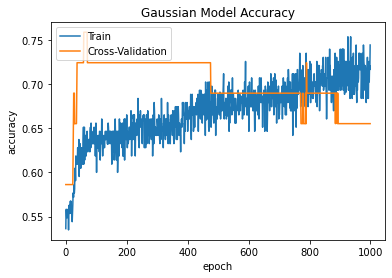

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Gaussian Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

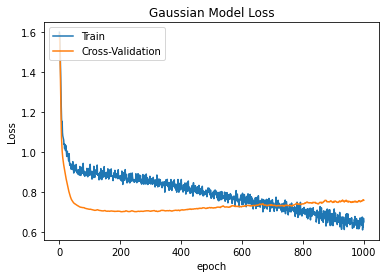

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Gaussian Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [28]:
print('Train Split: ')
loss, accuracy = gaussian_model.evaluate(x_train, y_train, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
8/8 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.7422
Accuracy   :  0.74 


In [29]:
print('Evaluation Split: ')
loss, accuracy =  gaussian_model.evaluate(x_valid, y_valid, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
1/1 - 0s - loss: 0.7598 - accuracy: 0.6552
Accuracy   :  0.66 


In [30]:
print('Test Split: ')
loss, accuracy =  gaussian_model.evaluate(x_test, y_test, verbose=2)

print("Accuracy   : {:5.2f}".format(accuracy))

Test Split: 
1/1 - 0s - loss: 1.5748 - accuracy: 0.5357
Accuracy   :  0.54


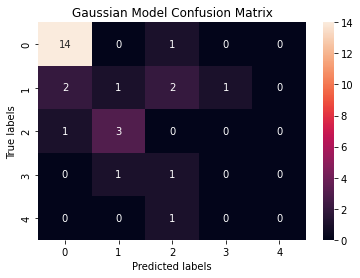

In [31]:
from sklearn.metrics import confusion_matrix

gaussian_cm_ax = plt.subplot()
gaussian_model_predict_results = gaussian_model.predict(x_test)

gaussian_model_predict_results = gaussian_model_predict_results.argmax(axis = 1)

test_labels = y_test.to_numpy().argmax(axis = 1)

gaussian_cm = confusion_matrix(test_labels, gaussian_model_predict_results)

sns.heatmap(gaussian_cm, annot=True, ax = gaussian_cm_ax);

gaussian_cm_ax.set_xlabel('Predicted labels');gaussian_cm_ax.set_ylabel('True labels'); 
gaussian_cm_ax.set_title('Gaussian Model Confusion Matrix'); 

In [32]:
# A transformation function needs to be made from the information we've got through the confusion matrix this is a test model

trans_dict = dict()

import numpy as np

cm = np.array([ [11, 1, 0, 0, 0], [4, 1, 0, 1, 2], [1, 0, 1, 0, 0], [0, 0, 1, 1, 2], [1, 0, 0, 1, 0] ])

total_correct = 0

for i in range(5):
    trans_dict[i] = dict()
    total_correct += cm[i][i]
    trans_dict[i]['correct_pred'] = cm[i][i]
    trans_dict[i]['wrong_pred'] = sum(cm[i][:i]) + sum(cm[i][i+1:])
    if cm[i][i] == np.max(cm[i]):
        trans_dict[i]['high'] = True
        temp = np.delete(cm[i], i)
        trans_dict[i]['high_value'] = max(temp)
    else:
        trans_dict[i]['high'] = False
        trans_dict[i]['high_value'] = max(cm[i])

for key in trans_dict:
    trans_dict[key]['reg_f'] = (total_correct - trans_dict[key]['correct_pred'])*2 + \
    ((trans_dict[key]['wrong_pred'] - trans_dict[key]['high_value'])//2 + trans_dict[key]['high_value'])//2
        

trans_dict

{0: {'correct_pred': 11,
  'wrong_pred': 1,
  'high': True,
  'high_value': 1,
  'reg_f': 6},
 1: {'correct_pred': 1,
  'wrong_pred': 7,
  'high': False,
  'high_value': 4,
  'reg_f': 28},
 2: {'correct_pred': 1,
  'wrong_pred': 1,
  'high': True,
  'high_value': 1,
  'reg_f': 26},
 3: {'correct_pred': 1,
  'wrong_pred': 3,
  'high': False,
  'high_value': 2,
  'reg_f': 27},
 4: {'correct_pred': 0,
  'wrong_pred': 2,
  'high': False,
  'high_value': 1,
  'reg_f': 28}}